## データの可視化について
## ヒストグラム編

データの分布を見るために利用する。
横軸に観測値をとり得る値をとり、縦軸にデータの度数(観測値がいくつあるのか)をとる。  
基本的に1変数の数値データのみしか扱えない。

### データの取り込み

ボストン市郊外の地域別住宅価格（https://archive.ics.uci.edu/ml/machine-learning-databases/housing/ ）のデータを取り込む。

In [1]:
from sklearn.datasets import load_boston
boston = load_boston() # データセットの読み込み

import pandas as pd
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names) 

In [2]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


### ヒストグラムによるデータの可視化

【ヒストグラムを使用する際に使用する用語説明】
- 階級・・・データを分類するための区間
- 階級値・・・階級を代表する値、階級の上限値と下限値の中間地を階級値とするのが一般的である
- 度数・・・データの数量



#### pandas.DataFrame.plotを用いた場合

boston_df['LSTAT'].plot.hist()とboston_df['LSTAT'].plot(kind=hist)は同様のグラフが得られる

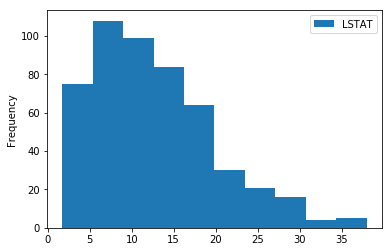

In [13]:
boston_df['LSTAT'].plot.hist(
    bins=10, #階級数
    legend=True, #凡例の描画
)

【参考】  
pandas.DataFrame.plotについて(公式):https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

#### matplotlibを用いた場合

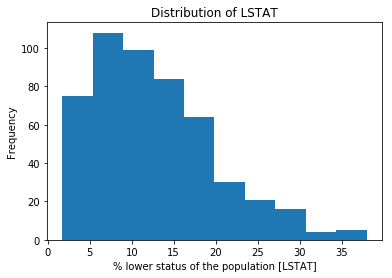

In [13]:
import matplotlib.pyplot as plt                       # ヒストグラムをプロットするために必要なライブラリ
plt.hist(x=boston_df['LSTAT'])                         # ヒストグラムをプロット

plt.title('Distribution of LSTAT')                     # 図のタイトル
plt.xlabel('% lower status of the population [LSTAT]') # x軸のラベル
plt.ylabel('Frequency')                                # y軸のラベル

plt.show()                                             # 図の表示

【参考】  
matplotlib.pyplot.histについて(公式):https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

#### seabornを用いた場合

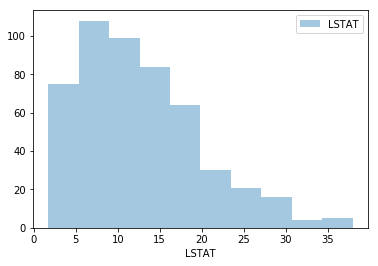

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt  
sns.distplot(
    boston_df['LSTAT'], #描画データ
    bins=10, #階級数
    label='LSTAT', #凡例の指定
    kde=False #密度近似関数の描画(defaultはTrue)
)

plt.legend() #凡例の表示
plt.show() #グラフの描画


【参考】  
seaborn.distplotについて(公式):https://seaborn.pydata.org/generated/seaborn.distplot.html

## ヒストグラムを使用する際の注意事項(可視化手法を使う場合の注意点)

### ヒストグラムの峰が二つ以上ある分布の場合

データによっては峰が二つ以上ある分布も生じることがある。  
そのような場合は通常、性質のことなるデータがまじりあっていることが多く、適当にグループ分けすると峰が一つの単純な分布が現れることが多い。  
このような操作を**層別**という。


### 階級の選び方

階級数は少なすぎても多すぎてもデータの意味するところが失われる。
そのため、適切な階級数を選ぶことが求められる・



#### 階級数が少ない場合

階級数が少なく、山型の分布をみることができない

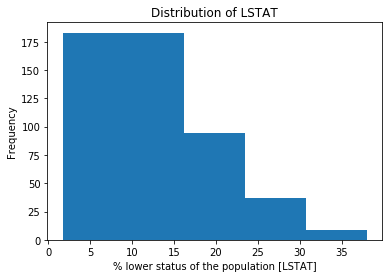

In [11]:
plt.hist(x=boston_df['LSTAT'],bins=5)                         # ヒストグラムの階級数を5でプロット

plt.title('Distribution of LSTAT')                     # 図のタイトル
plt.xlabel('% lower status of the population [LSTAT]') # x軸のラベル
plt.ylabel('Frequency')                                # y軸のラベル

plt.show()                                             # 図の表示

#### 階級数が多い場合

階級数を増やすと分布は細かい形となるが、階級によって小さなデコボコが生じるため、  
データの偶然性に影響を受けやすくなる。(本例ではその影響は小さい)

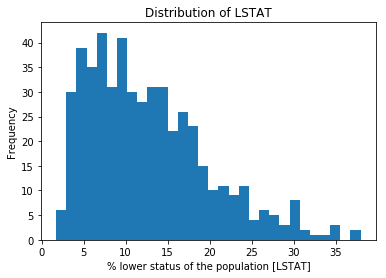

In [12]:
plt.hist(x=boston_df['LSTAT'],bins=30)                         # ヒストグラムの階級数を30でプロット

plt.title('Distribution of LSTAT')                     # 図のタイトル
plt.xlabel('% lower status of the population [LSTAT]') # x軸のラベル
plt.ylabel('Frequency')                                # y軸のラベル

plt.show()                                             # 図の表示

#### 適切な階級数の選び方

階級数の選び方は様々あるが、本資料ではスタージェスの公式による求め方を紹介する。


#### スタージェスの公式による階級数の求め方

$k=1+log_2N=1+\frac{(log_{10}n)}{(log_{10}2)}$\(k:階級数,N:観測値の数)

ボストン住宅価格のデータの観測値の数:Nは506である。  
これを上記式に当てはめると、k≒10となるため、ヒストグラムの階級数を10として描画する。

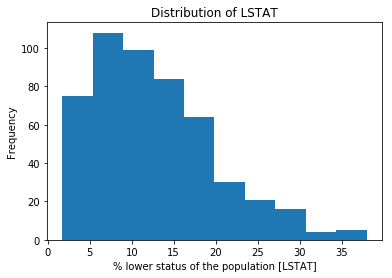

In [23]:
plt.hist(x=boston_df['LSTAT'],bins=10)                         # ヒストグラムの階級数を30でプロット

plt.title('Distribution of LSTAT')                     # 図のタイトル
plt.xlabel('% lower status of the population [LSTAT]') # x軸のラベル
plt.ylabel('Frequency')                                # y軸のラベル

plt.show()                                             # 図の表示

### 参考文献

「統計学入門」東京大学教養学部統計学教室編  
データ可視化チートシート　https://qiita.com/m_mizutani/items/26971c29fa990617a935